In [1]:
import numpy as np
import math
import itertools
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import norm

# Empirical recreation of the convergence in distribution to the normal(0, 2 * tau^4)

1. The global null hypothesis H_0 is true (i.e, we have zero effective factors)
2. The covariance matrix is the identity matrix of dimension d multiplied by tau^2
3. The data are sampled from a normal distribution

In [2]:
np.random.seed(43)
tau = 3
true_cov_matrix = np.identity(3000)
true_cov_matrix = tau * true_cov_matrix
random_samples = np.random.multivariate_normal(mean=np.zeros(3000), cov=true_cov_matrix, size=126)
print(random_samples.shape)

(126, 3000)


In [3]:
n = random_samples.shape[0]
d = random_samples.shape[1]

In [4]:
squared_lengths = np.sum(random_samples**2, axis = 1)
standardized_values = (np.sqrt(d)/d) * (squared_lengths - d * tau**2)
theoretical_variance = 2 * tau**4

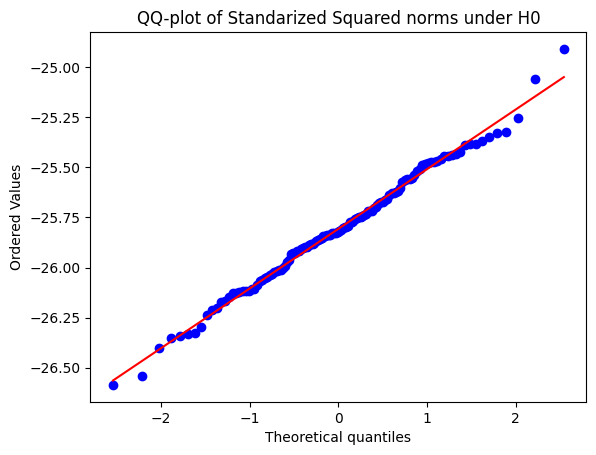

In [5]:
stats.probplot(standardized_values/ np.sqrt(theoretical_variance), dist = "norm", plot = plt)
plt.title("QQ-plot of Standarized Squared norms under H0")
plt.show()

Figure out a way to automate this so I can test the QQ-plot for multiple different values of d and tau

If we fix tau, then as d gets larger and larger, the QQ plot reveals more normality in our underlying data. For smaller values of d, the QQ plot reveals a little bit of skewness at the extrema.

# Lilliefors test statistic

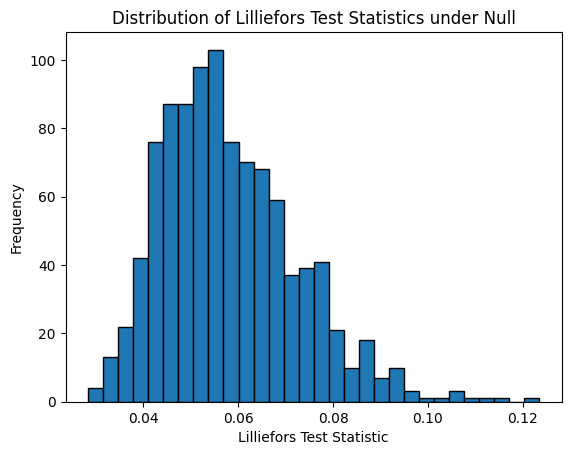

5th, 50th, 95th percentiles: [0.03910254 0.05603302 0.08370895]


In [6]:
np.random.seed(43)
tau = 3
n = 126
d = 200
num_simulations = 1000

# Storage for test statistics
lilliefors_statistics = []

# Run simulations
for _ in range(num_simulations):
    # Simulate multivariate normal samples
    true_cov_matrix = tau * np.identity(d)
    random_samples = np.random.multivariate_normal(mean=np.zeros(d), cov=true_cov_matrix, size=n)

    # Squared lengths and standardized values
    squared_lengths = np.sum(random_samples**2, axis=1)
    standardized_values = (np.sqrt(d) / d) * (squared_lengths - d * tau**2)

    # Perform Lilliefors test (returns stat, p-value)
    stat, p_value = lilliefors(standardized_values, dist='norm')
    lilliefors_statistics.append(stat)

# Convert to numpy array for convenience
lilliefors_statistics = np.array(lilliefors_statistics)

# Plot empirical distribution
plt.hist(lilliefors_statistics, bins=30, edgecolor='black')
plt.title("Distribution of Lilliefors Test Statistics under Null")
plt.xlabel("Lilliefors Test Statistic")
plt.ylabel("Frequency")
plt.show()

# Print percentiles
print("5th, 50th, 95th percentiles:", np.percentile(lilliefors_statistics, [5, 50, 95]))

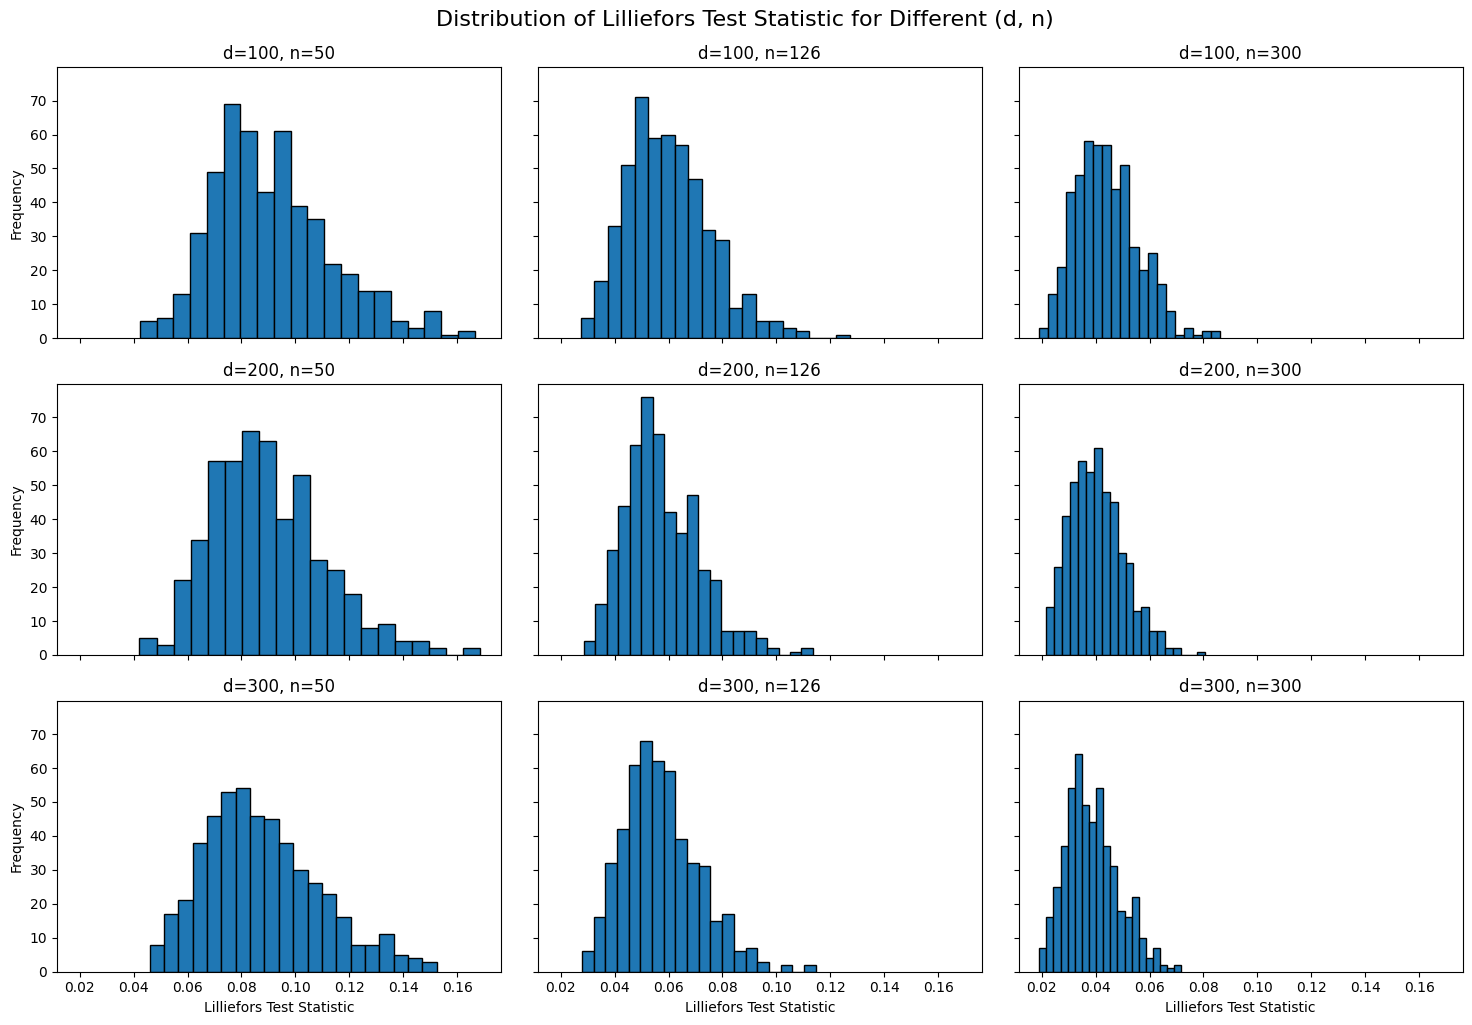

In [7]:
# Set parameters
np.random.seed(43)
tau = 3
d_values = [100, 200, 300]
n_values = [50, 126, 300]
num_simulations = 500

# Function to simulate and compute Lilliefors stats
def simulate_lilliefors_statistics(n, d, num_simulations):
    stats = []
    for _ in range(num_simulations):
        cov_matrix = tau * np.identity(d)
        samples = np.random.multivariate_normal(mean=np.zeros(d), cov=cov_matrix, size=n)
        squared_lengths = np.sum(samples**2, axis=1)
        standardized_values = (np.sqrt(d) / d) * (squared_lengths - d * tau**2)
        stat, p_value = lilliefors(standardized_values, dist='norm')
        stats.append(stat)
    return stats

# Create subplots
fig, axes = plt.subplots(len(d_values), len(n_values), figsize=(15, 10), sharex=True, sharey=True)

# Loop through combinations and plot
for i, d in enumerate(d_values):
    for j, n in enumerate(n_values):
        stats = simulate_lilliefors_statistics(n, d, num_simulations)
        ax = axes[i, j]
        ax.hist(stats, bins=20, edgecolor='black')
        ax.set_title(f"d={d}, n={n}")
        if i == len(d_values)-1:
            ax.set_xlabel("Lilliefors Test Statistic")
        if j == 0:
            ax.set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Distribution of Lilliefors Test Statistic for Different (d, n)", fontsize=16, y=1.02)
plt.show()